# Why Python?

 - Growing scientific computing stack
 - High-level data analytics meets general-purpose computing language
 - Unifies all the steps in a single language / environment
   - Data ingest
   - Analytics
   - Visualization
   - Production classifier

# IPython Notebook

 - Combination notebook, code editor, and plots
 - Not quite a data analytics environment like RStudio/MATLAB/etc.

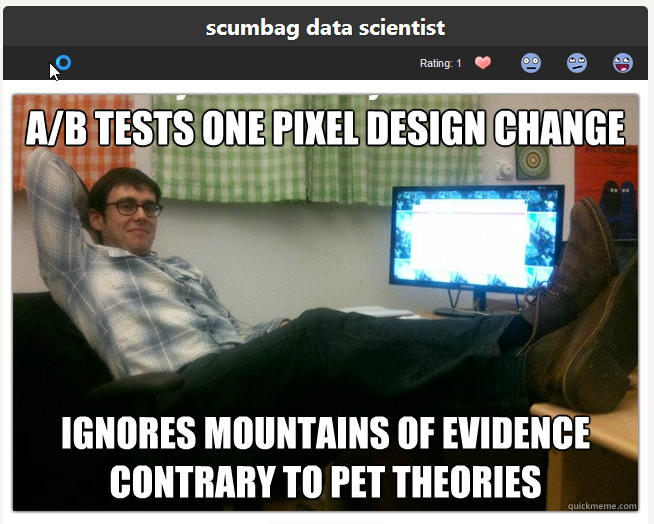

In [1]:
from IPython.display import Image
Image(filename="design-change.png")

# Read the data

In [3]:
import os
import pandas as pd

In [4]:
data_path = os.path.join(os.environ["DataPath"], # Useful to have a single parent folder for all data & an environmental variable referencing it
                         "StackOverflow", 
                         "Transformed", 
                         "train-sample.csv")
data_path                                        # This displays the value of the variable

'C:\\Users\\ben_000\\Dropbox\\Data\\StackOverflow\\Transformed\\train-sample.csv'

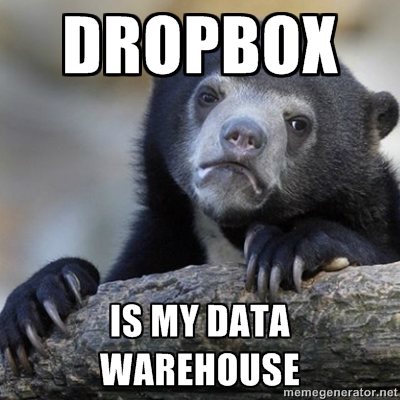

In [5]:
Image(filename="confession.jpg")

In [6]:
# use ! to execute shell commands

!head $data_path

PostId,PostCreationDate,OwnerUserId,OwnerCreationDate,ReputationAtPostCreation,OwnerUndeletedAnswerCountAtPostTime,Title,BodyMarkdown,Tag1,Tag2,Tag3,Tag4,Tag5,PostClosedDate,OpenStatus
6046168,05/18/2011 14:14:05,543315,09/17/2010 10:15:06,1,2,For Mongodb is it better to reference an object or use a natural String key?,"I am building a corpus of indexed sentences in different languages. I have a collection of Languages which have both an ObjectId and the ISO code as a key. Is it better to use a reference to the Language collection or store a key like ""en"" or ""fr""?

I suppose it's a compromise between:

 - ease of referencing the Language
 - object in that collection
 - speed in doing queries where the sentence has a certain language
 - the size of the data on disk



In [7]:
# line count
!wc $data_path 

2465591 16479973 139669798 C:\Users\ben_000\Dropbox\Data\StackOverflow\Transformed\train-sample.csv


In [8]:
%time data = pd.read_csv(data_path)  # %time directive times how long command takes

CPU times: user 1.97 s, sys: 0.00 s, total: 1.97 s
Wall time: 1.97 s


# Explore the data

In [9]:
data # default summary of Pandas DataFrame

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140272 entries, 0 to 140271
Data columns:
PostId                                 140272  non-null values
PostCreationDate                       140272  non-null values
OwnerUserId                            140272  non-null values
OwnerCreationDate                      140272  non-null values
ReputationAtPostCreation               140272  non-null values
OwnerUndeletedAnswerCountAtPostTime    140272  non-null values
Title                                  140272  non-null values
BodyMarkdown                           140272  non-null values
Tag1                                   140270  non-null values
Tag2                                   113044  non-null values
Tag3                                   75944  non-null values
Tag4                                   39663  non-null values
Tag5                                   15717  non-null values
PostClosedDate                         70136  non-null values
OpenStatus                    

In [10]:
len(data)  # number of rows in DataFrame

140272

In [11]:
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 100)

data[21:24]

,PostId,PostCreationDate,OwnerUserId,OwnerCreationDate,ReputationAtPostCreation,OwnerUndeletedAnswerCountAtPostTime,Title,BodyMarkdown,Tag1,Tag2,Tag3,Tag4,Tag5,PostClosedDate,OpenStatus
21,6508144,06/28/2011 14:32:56,486720,10/25/2010 17:26:57,313,1,On algrithms that minimizes maximal load of bins.,There are $n$ bins and $m$ balls. Balls are wi...,algorithm,NaN,NaN,NaN,NaN,06/28/2011 14:43:26,off topic
22,11157471,06/22/2012 13:48:15,575359,01/14/2011 07:31:37,69,0,Recursive Mogrify Script,Another question from a newbie linux scripter....,linux,mogrify,NaN,NaN,NaN,06/22/2012 23:46:28,too localized
23,7852524,10/21/2011 16:38:39,478252,10/17/2010 00:21:46,370,26,Get the values of selected checkboxes from an ...,I am trying to get the selected value (or valu...,c#,jquery,asp.net,checkboxlist,NaN,NaN,open


In [12]:
data.describe() # summarize any numeric columns in DataFrame

,PostId,OwnerUserId,ReputationAtPostCreation,OwnerUndeletedAnswerCountAtPostTime
count,140272.000000,140272.000000,140272.000000,140272.000000
mean,7009516.050787,652333.589483,506.633904,19.467891
std,7718922.086628,786508.545774,2495.902443,90.120686
min,13.000000,3.000000,-34.000000,0.000000
25%,4552288.500000,267831.000000,1.000000,0.000000
50%,7446571.000000,612266.000000,35.000000,1.000000
75%,9758644.000000,999409.500000,267.000000,8.000000
max,11750654.000000,1567174.000000,209631.000000,5772.000000


In [13]:
data.OpenStatus.unique() 

array([open, too localized, not a real question, off topic,
       not constructive], dtype=object)

In [14]:
from collections import Counter              # If you need to do it, someone's already written it
open_counts = Counter(data["OpenStatus"])
open_counts

Counter({'open': 70136, 'not a real question': 30789, 'off topic': 17530, 'not constructive': 15659, 'too localized': 6158})

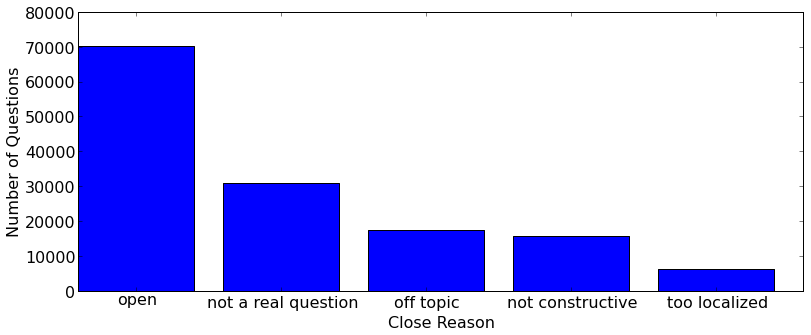

In [15]:
def plot_counter(counter, max_items=10):
    data = [(k,counter[k]) for k in counter]
    data = sorted(data, key=lambda x: x[1], reverse=True)[:max_items]
    ax = plt.axes()
    ax.bar(range(len(data)), [x[1] for x in data])
    ax.set_xticks(np.array(range(len(data)))+0.4)
    labels = [x[0] for x in data]
    ax.set_xticklabels(labels);

matplotlib.rcParams['figure.figsize'] = (13, 5)
matplotlib.rcParams['font.size']=16

plot_counter(open_counts)
xlabel("Close Reason")
ylabel("Number of Questions")

# stratified sample

In [16]:
def list_from_df_series(df, series_names):
    els = []
    for col in series_names:
        els.extend(df[col])
    return els

all_tags = list_from_df_series(data, ["Tag1", "Tag2", "Tag3", "Tag4", "Tag5"])
all_tags[:10]

['mongodb',
 'dom',
 'sql-server',
 'php',
 'mongodb',
 'jquery',
 'regex',
 'c++',
 'silverlight-4.0',
 'vb']

In [17]:
tag_counter = Counter(all_tags)
del tag_counter[nan]
tag_counter.most_common(20)

[('php', 13134),
 ('c#', 12076),
 ('java', 11870),
 ('javascript', 8925),
 ('android', 8502),
 ('jquery', 6835),
 ('c++', 6203),
 ('iphone', 5125),
 ('python', 4731),
 ('html', 4550),
 ('asp.net', 4511),
 ('mysql', 4442),
 ('.net', 4015),
 ('c', 3494),
 ('css', 3147),
 ('sql', 3053),
 ('ios', 2974),
 ('objective-c', 2908),
 ('linux', 2425),
 ('ruby-on-rails', 2368)]

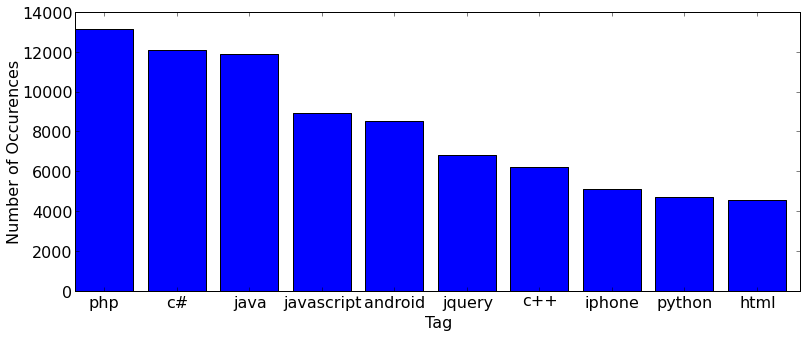

In [18]:
plot_counter(tag_counter)
xlabel("Tag")
ylabel("Number of Occurences")

# Extract Features

#### Get the dependent variable: was the question closed?

In [19]:
# apply function takes a function and applies it to each element of the series
# "map" for pandas Series
# analogous to sapply in R

open_or_closed = data["OpenStatus"].apply(lambda x: "Open" if x=="open" else "Closed")
open_or_closed.name = "OpenOrClosed"
open_or_closed

0       Open
1       Open
2       Open
3     Closed
4       Open
5       Open
6       Open
7     Closed
8     Closed
9     Closed
10      Open
11    Closed
12      Open
13      Open
14    Closed
...
140257    Closed
140258    Closed
140259      Open
140260      Open
140261    Closed
140262    Closed
140263    Closed
140264      Open
140265      Open
140266    Closed
140267      Open
140268      Open
140269    Closed
140270    Closed
140271      Open
Name: OpenOrClosed, Length: 140272

In [20]:
is_closed = data["OpenStatus"].apply(lambda x: 0 if x=="open" else 1)
is_closed.name = "IsClosed"
is_closed

0     0
1     0
2     0
3     1
4     0
5     0
6     0
7     1
8     1
9     1
10    0
11    1
12    0
13    0
14    1
...
140257    1
140258    1
140259    0
140260    0
140261    1
140262    1
140263    1
140264    0
140265    0
140266    1
140267    0
140268    0
140269    1
140270    1
140271    0
Name: IsClosed, Length: 140272

#### Length of the title (number of characters)

In [21]:
title_length = data["Title"].apply(len)
title_length.name = "Length\nTitle"
pd.DataFrame(data["Title"]).join(title_length)[:5]

,Title,Length Title
0,For Mongodb is it better to reference an objec...,76
1,How to insert schemalocation in a xml document...,54
2,Too many lookup tables,23
3,What is this PHP code in VB.net,31
4,Spring-Data mongodb querying multiple classes ...,75


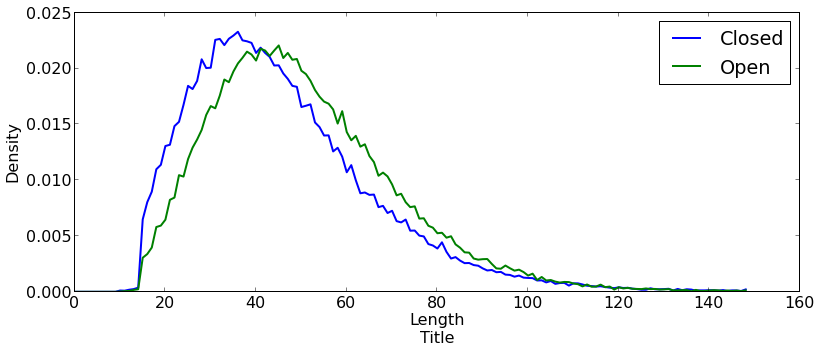

In [22]:
def plot_density(groups, fea, bins=25, fea_range_quantile=(0.0, 1.0)):
    fea_range = (fea.quantile(fea_range_quantile[0]), fea.quantile(fea_range_quantile[1]))
    for group in sorted(groups.unique()):
        hist, edges = np.histogram(fea[group==groups], bins=bins, range=fea_range, density=True)
        plot(edges[:-1], hist, linewidth=2)
    legend(sorted(groups.unique()))
    xlabel(fea.name)
    ylabel("Density")

plot_density(open_or_closed, title_length, bins=range(0,150,1))

#### Length of the question body (number of characters)

In [23]:
body_length = data["BodyMarkdown"].apply(len)
body_length.name = "Length\nBody"
pd.DataFrame(data["BodyMarkdown"]).join(body_length)[:5]

,BodyMarkdown,Length Body
0,I am building a corpus of indexed sentences in...,504
1,i create a xml document with JAXP and search a...,957
2,What are the adverse effects of having too man...,186
3,I am looking for the vb.net equivalent of this...,919
4,"With Spring-Data, you can use the @Document an...",610


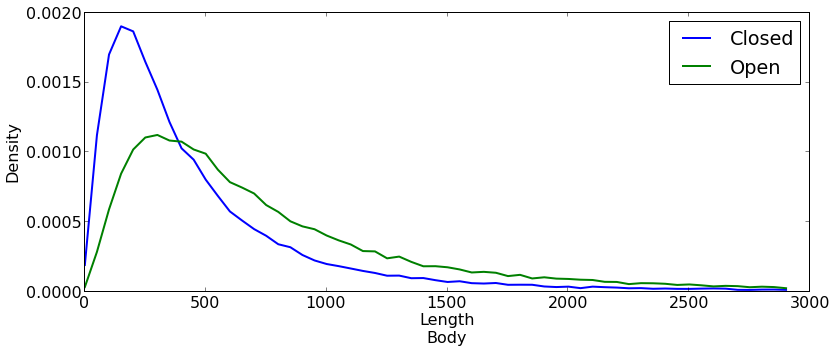

In [24]:
plot_density(open_or_closed, body_length, bins=range(0,3000,50))

#### Bag of Words features

In [25]:
from sklearn.feature_extraction.text import CountVectorizer

CountVectorizer?

In [26]:
title_vectorizer = CountVectorizer(max_features=100)
%time title_bow = title_vectorizer.fit_transform(data["Title"]).todense()
title_words = ["Title\n"+x for x in sorted(title_vectorizer.vocabulary_)]
title_bow_fea = pd.DataFrame(title_bow, columns=title_words)
title_bow_fea[:10]

CPU times: user 5.35 s, sys: 0.00 s, total: 5.35 s
Wall time: 5.36 s


,Title add,Title all,Title an,Title and,Title android,Title any,Title app,Title application,Title are,Title array,Title as,Title asp,Title be,Title best,Title between,Title by,Title can,Title class,Title code,Title create,Title data,Title database,Title do,Title does,Title error,Title file,Title files,Title find,Title for,Title form,Title from,Title function,Title get,Title good,Title google,Title help,Title how,Title html,Title if,Title image,Title in,Title into,Title iphone,Title is,Title it,Title java,Title javascript,Title jquery,Title like,Title list,Title make,Title method,Title multiple,Title my,Title mysql,Title need,Title net,Title not,Title object,Title of,Title on,Title one,Title or,Title page,Title php,Title problem,Title programming,Title project,Title python,Title query,Title rails,Title server,Title set,Title sql,Title string,Title table,Title text,Title that,Title the,Title there,Title this,Title time,Title to,Title use,Title user,Title using,Title value,Title vs,Title way,Title web,Title what,Title when,Title which,Title why,Title windows,Title with,Title work,Title working,Title xml,Title you
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [27]:
body_vectorizer = CountVectorizer(max_features=100)
%time body_bow = body_vectorizer.fit_transform(data["BodyMarkdown"]).todense()
body_words = ["Body\n"+x for x in sorted(body_vectorizer.vocabulary_)]
body_bow_fea = pd.DataFrame(body_bow, columns=body_words)
body_bow_fea[:10]

CPU times: user 33.67 s, sys: 0.00 s, total: 33.67 s
Wall time: 33.67 s


,Body about,Body all,Body am,Body an,Body and,Body android,Body any,Body app,Body application,Body are,Body as,Body at,Body be,Body but,Body by,Body can,Body class,Body code,Body com,Body data,Body div,Body do,Body error,Body file,Body for,Body from,Body function,Body get,Body has,Body have,Body help,Body here,Body how,Body html,Body http,Body id,Body if,Body in,Body int,Body is,Body it,Body java,Body just,Body know,Body like,Body me,Body my,Body name,Body need,Body new,Body no,Body not,Body of,Body on,Body one,Body only,Body or,Body org,Body other,Body out,Body page,Body php,Body problem,Body public,Body return,Body server,Body set,Body should,Body so,Body some,Body string,Body system,Body text,Body thanks,Body that,Body the,Body then,Body there,Body this,Body time,Body to,Body type,Body use,Body user,Body using,Body value,Body ve,Body void,Body want,Body way,Body we,Body web,Body what,Body when,Body where,Body which,Body will,Body with,Body would,Body you
0,0,0,1,1,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,2,0,0,0,0,0,0,0,3,0,1,2,0,0,1,1,0,0,0,0,0,0,0,5,1,0,0,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,6,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,0,1,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,5,1,0,0,0,1,2,2,1,0,1,0,0,0,0,1,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,0,1,0,0,4,0,0,0,0,0,0,0,0,0,0,1,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
4,0,0,0,1,2,0,0,0,0,0,1,0,0,0,1,1,2,1,0,3,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,3,0,2,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,2,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,6,0,0,1,0,5,0,1,0,0,0,0,0,1,0,0,0,0,1,0,3,0,1,0,1
5,0,0,0,2,3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,0,0,0,0,0,0,3,0,1,1,0,0,0,0,0,0,0,2,0,3,0,0,0,0,0,0,1,0,0,1,0,0,1,3,0,1,0,0,1,0,1,0,0,0,0,0,0,2,0,1,0,0,0,0,0,7,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,3,0,2,0,0,0,0
6,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,2,0,0,0,0,1,0,0,0,0,0,0,2,1,0,2,1,0,0,0,0,0,1,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,0,0,1,0,1,0,1,1,0,2,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,1,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,2,0,0,0,0,0,0,0,1,1,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,3,0,0,0,0,0,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
9,0,2,2,0,5,0,1,0,0,1,0,0,1,0,0,0,0,0,0,5,0,0,0,8,4,0,0,0,0,0,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3,6,0,0,3,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,4,1,0,5,0,0,0,0,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0


CPU times: user 20.01 s, sys: 0.00 s, total: 20.01 s
Wall time: 20.01 s


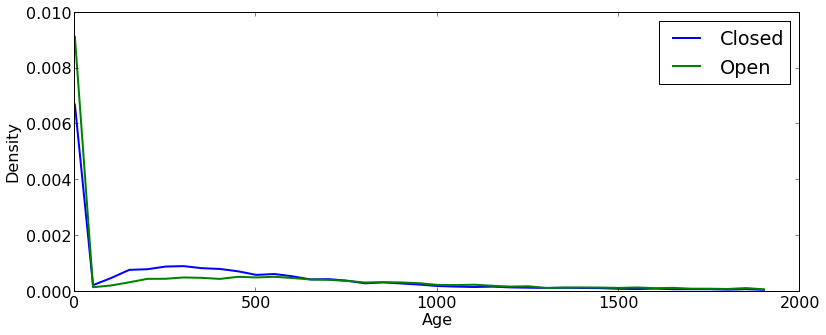

In [28]:
from dateutil.parser import parse
%time time_diff = [(parse(x)-parse(y)).total_seconds() for x,y in zip(data.PostCreationDate,data.OwnerCreationDate)]
time_diff = pd.Series(time_diff, index=data.index)
time_diff.name = "Age"
plot_density(open_or_closed, time_diff, bins = range(0,2000,50))

In [29]:
reputation = data["ReputationAtPostCreation"]
reputation.name = "Reputation"

num_answers = data["OwnerUndeletedAnswerCountAtPostTime"]
num_answers.name = "# Answers"

fea = pd.DataFrame(index=data.index)
fea = (fea.join(title_length)
          .join(body_length)
          .join(title_bow_fea)
          .join(body_bow_fea)
          .join(num_answers)
          .join(reputation)
          .join(time_diff))
fea

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140272 entries, 0 to 140271
Columns: 205 entries, Length
Title to Age
dtypes: float64(1), int64(204)

In [30]:
body_you = fea["Body\nyou"].apply(lambda x: 1 if x>0 else 0)
df = pd.DataFrame(body_you).join(is_closed)
df.groupby("Body\nyou").mean()

,IsClosed
Body you,
0,0.483690
1,0.562683


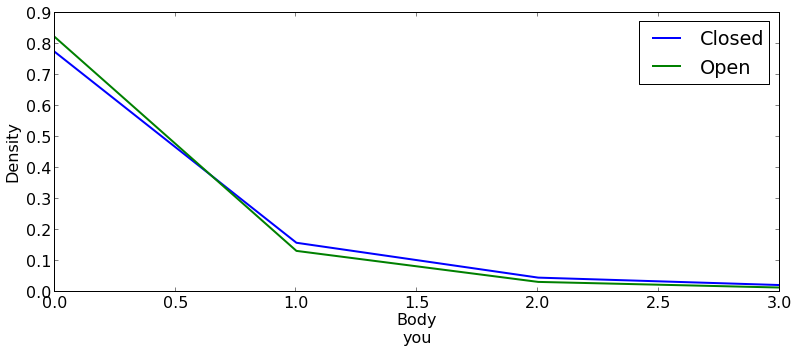

In [31]:
plot_density(open_or_closed, fea["Body\nyou"], bins=range(0,5))

In [32]:
bl = fea["Length\nBody"].apply(lambda x: min(round(x/100), 20))
df = pd.DataFrame(bl).join(is_closed)
df.groupby("Length\nBody").mean()

,IsClosed
Length Body,
0,0.806661
1,0.718001
2,0.626811
3,0.550788
4,0.489034
5,0.448127
6,0.418662
7,0.394533
8,0.383541


# Train A Classifier

In [33]:
from sklearn.cross_validation import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(fea, is_closed, test_size = 0.5, random_state=1)
X_train

array([[  3.90000000e+01,   1.66000000e+02,   0.00000000e+00, ...,
          0.00000000e+00,   1.00000000e+00,   8.66000000e+02],
       [  3.80000000e+01,   8.36000000e+02,   0.00000000e+00, ...,
          0.00000000e+00,   1.00000000e+00,   9.07400000e+03],
       [  4.40000000e+01,   2.32000000e+02,   0.00000000e+00, ...,
          5.00000000e+00,   9.81000000e+02,   6.58392400e+07],
       ..., 
       [  2.10000000e+01,   7.65000000e+02,   0.00000000e+00, ...,
          0.00000000e+00,   9.40000000e+01,   5.00882000e+06],
       [  4.00000000e+01,   3.22000000e+02,   0.00000000e+00, ...,
          0.00000000e+00,   1.30000000e+01,   4.97419900e+06],
       [  4.50000000e+01,   7.10000000e+02,   0.00000000e+00, ...,
          0.00000000e+00,   2.23000000e+02,   9.18629900e+06]])

In [35]:
X_test_df = pd.DataFrame(X_test, columns=fea.columns)
X_test_df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70136 entries, 0 to 70135
Columns: 205 entries, Length
Title to Age
dtypes: float64(205)

In [36]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
rf = RandomForestClassifier(n_estimators        = 32,     # Number of decision trees
                            min_samples_leaf    = 30,
                            min_samples_split   = 30,
                            compute_importances = True,
                            n_jobs              = -1)     # Number of cores I'm using in parallel)
rf

RandomForestClassifier(bootstrap=True, compute_importances=True,
            criterion='gini', max_depth=None, max_features='auto',
            min_density=0.1, min_samples_leaf=30, min_samples_split=30,
            n_estimators=32, n_jobs=-1, oob_score=False, random_state=None,
            verbose=0)

In [38]:
%time rf.fit(X_train, y_train);

CPU times: user 25.50 s, sys: 0.00 s, total: 25.50 s
Wall time: 25.50 s


# Evaluate The Results

# %time preds = rf.predict(X_test)
probs = rf.predict_proba(X_test)
open_prob = probs[:,0]

probs

In [40]:
import ml_metrics as metrics

In [41]:
1-metrics.ce(y_test, preds)

0.705400935325653

In [42]:
metrics.auc(y_test, probs[:,1]) # Metric between 0.5 and 1.0, used for contest later

0.774745104089192

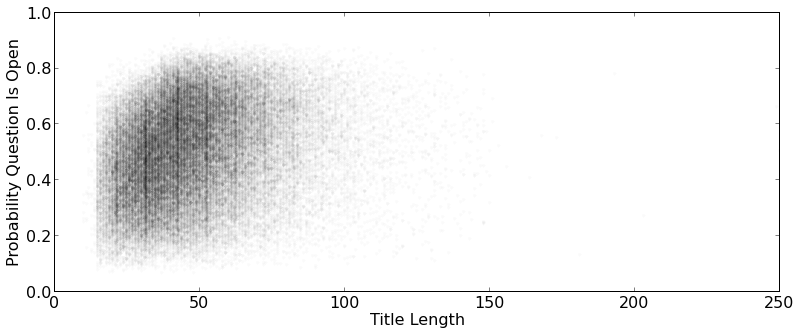

In [45]:
plot(X_test_df["Length\nTitle"],open_prob,'k.', alpha=0.02)
xlabel("Title Length")
ylabel("Probability Question Is Open");

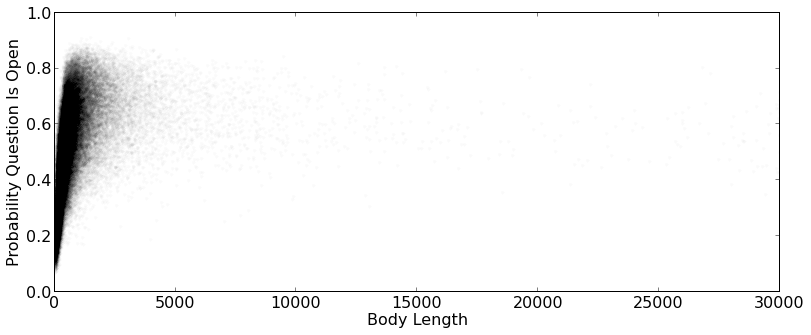

In [47]:
plot(X_test_df["Length\nBody"],open_prob,'k.', alpha=.02)
xlabel("Body Length")
ylabel("Probability Question Is Open");

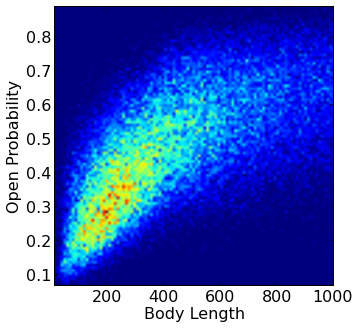

In [48]:
def plot_density_2d(x, y, bins=100, xlim=None):
    if xlim is not None:
        data = [(a,b) for a,b in zip (x,y) if xlim[0]<=a<=xlim[1]]
        x = [d[0] for d in data]
        y = [d[1] for d in data]
    heatmap, xedges, yedges = np.histogram2d(y, x, bins=bins)
    extent = [yedges[0], yedges[-1], xedges[0], xedges[-1]]
    width = xedges[-1]-xedges[0]
    height = yedges[-1]-yedges[0]
    plt.imshow(heatmap, extent=extent, aspect=height/width, origin="lower")

plot_density_2d(X_test_df["Length\nBody"], open_prob, xlim=[0, 1000], bins=100)
xlabel("Body Length")
ylabel("Open Probability")

[0, 200, 0, 1]

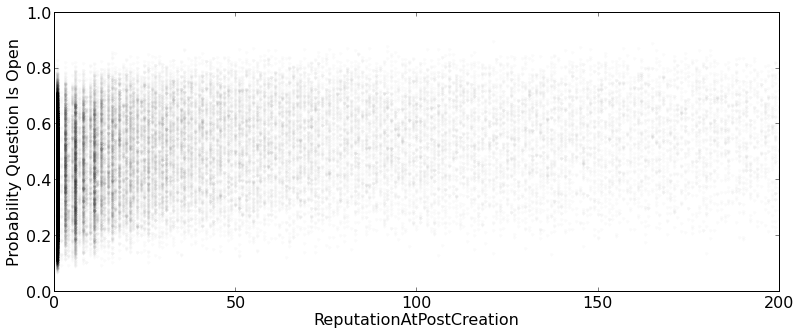

In [51]:
plot(X_test_df["Reputation"],open_prob,'k.', alpha=0.02)
xlabel("ReputationAtPostCreation")
ylabel("Probability Question Is Open");
axis([0,200,0,1])
# Box and Whiskers

In [52]:
fea_imp = sorted(zip(fea.columns, rf.feature_importances_), key=lambda x:x[1], reverse=True)
fea_imp

[('Length\nBody', 0.12320810448722778),
 ('Reputation', 0.064382563388898625),
 (u'Body\nthe', 0.063702070036297798),
 ('Length\nTitle', 0.04885482921404409),
 ('Age', 0.046995795761379404),
 ('# Answers', 0.045266701600163127),
 (u'Body\nthis', 0.043542064240907528),
 (u'Body\nto', 0.024736062749948492),
 (u'Body\nis', 0.022574810042848028),
 (u'Body\nwhen', 0.022414373045949423),
 (u'Body\nid', 0.021746807840121937),
 (u'Body\nclass', 0.017377331598686305),
 (u'Body\nfunction', 0.016082816717175104),
 (u'Body\nin', 0.015736293715359055),
 (u'Body\nyou', 0.015577531617766132),
 (u'Body\nway', 0.015453608223173586),
 (u'Title\nwhat', 0.013537919447900367),
 (u'Body\nvalue', 0.013191580567080216),
 (u'Body\nstring', 0.01264844579410598),
 (u'Body\nfor', 0.011979882853564118),
 (u'Body\nand', 0.011918249948882867),
 (u'Body\nbut', 0.011553540274010293),
 (u'Body\nerror', 0.011193599992857213),
 (u'Body\nset', 0.010973219424097264),
 (u'Body\nme', 0.010910058596732157),
 (u'Body\nget', 0.

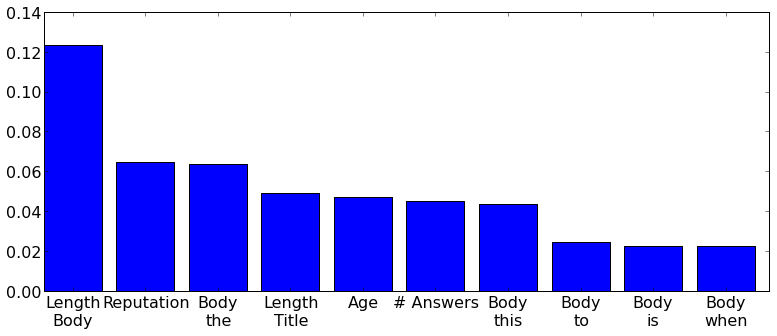

In [53]:
plot_counter(dict(fea_imp))

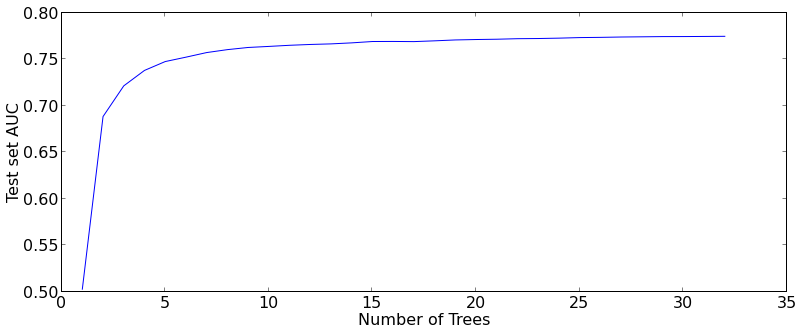

In [54]:
tree_predictions = [tree.predict_proba(X_test)[..., np.newaxis] for tree in rf.estimators_]
tree_predictions = np.concatenate(tree_predictions, axis=2)

auc = []
for i in range(rf.n_estimators):
    auc.append(metrics.auc(y_test, np.mean(tree_predictions[:,:,:i], axis=2)[:,1]))

plot(range(1,rf.n_estimators+1), auc)
xlabel("Number of Trees")
ylabel("Test set AUC")